# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for data preparation and model building
# import *

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#Load train data
df_train = pd.read_csv("df_train.csv", index_col=0)

In [3]:
#Brief view of data
df_train.head(10)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,0.0,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,0.0,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


In [4]:
# View data quality
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


    Looking at the above results, the column "Valencia_pressure" contains some null values, it will be necessary to determine the proportion of the null values to the total data expected for the colunm, to aid decision with the column.

In [5]:
# look at data statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


### Evaluate correlation
We evaluate the correlation of the data set.

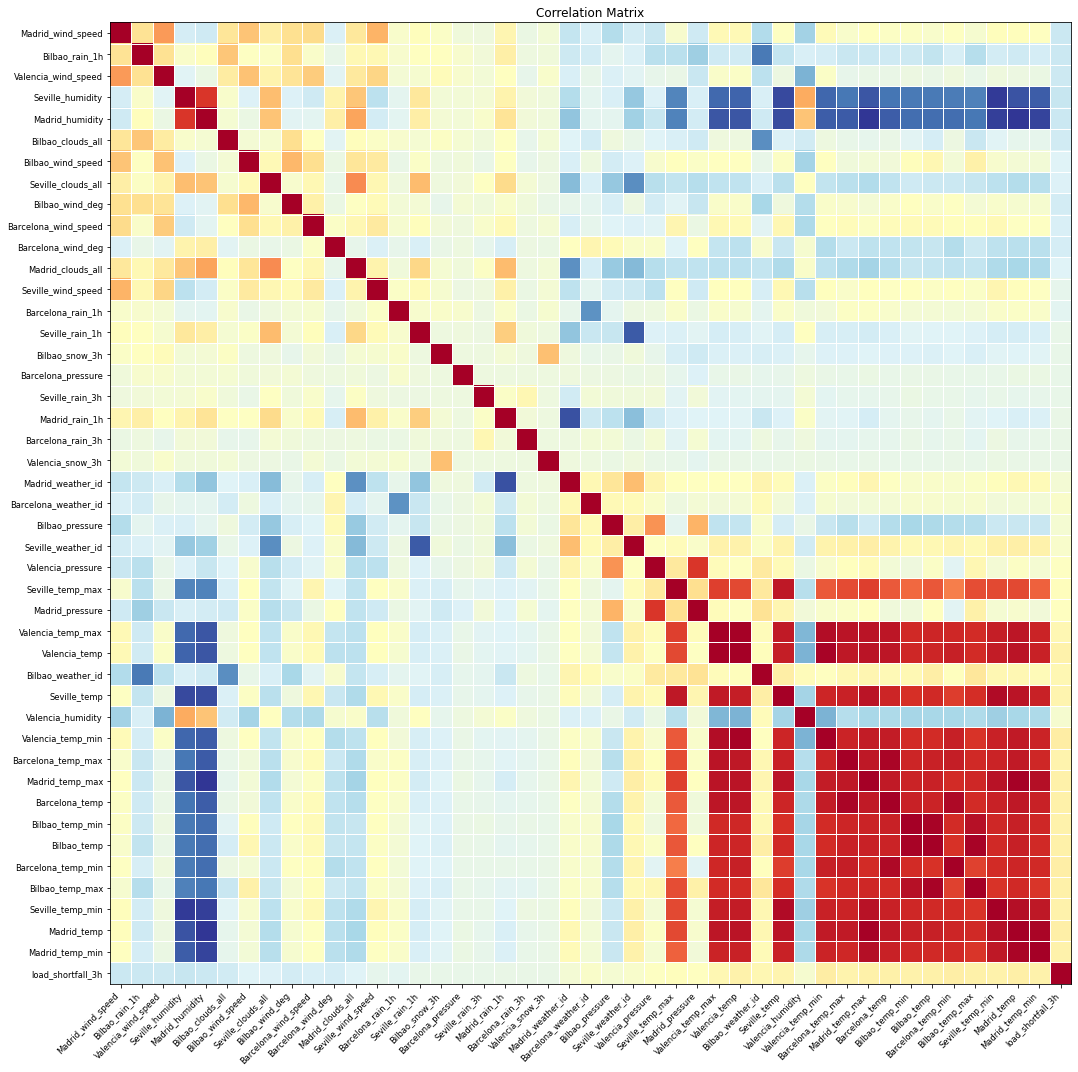

In [6]:
# evaluate correlation
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

From the above diagram, it can be seen that the temprature readings seeriously correlated and a strong decision should be taken in droping some of these columns before building our model.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### Remove missing values/ features

The proportion of null values in the Valencia_pressure column is around 23% of the total row count, for now, we may consider replacing these missing values with the average value for the entire colunm.

*We write a function that replaces the missing values for a colunm in a dataframe with its mean value*

In [7]:
#function replacee_null_with_mean replace the null values in a dataframe column with its mean value    

def replace_null_with_mean(df, col):
    df_cols = df.columns
    if col not in df_cols:
        raise ValueError
        
    new_df = df.copy()
    mean_val = new_df[col].mean()
    
    def mean_value(val):
        if np.isnan(val) :
            return mean_val
        return val
    
    new_df[col] = new_df[col].apply(mean_value)
    
    return new_df
  

*Replace the null values in column Valencia_pressure with its mean value*

In [8]:
improved_df = replace_null_with_mean(df_train, "Valencia_pressure")

#### Change of variable name 
Going forward, we shall be working with the variable name 
#####  *improved_df* 
as the variable that contains the training data set.

In [9]:
# look at data statistics
improved_df['Valencia_pressure'].isna().sum()

0

### Create new features

#### Conducted some domain research 

From the result of the little domain research conducted, it can be infered that the columns which ends with 
#### *'clouds_all', 'weather_id', 'temp','temp_min'*
might not be necessarily be useful for the purpose of this operation, hence all columns associated with these values can be droped.

In [10]:
# function drop_columns accepts a dataframe, a turple of columns that should be droped, and returns a new dataframe
def drop_columns(df, cols):
    col_name = [col for col in df if col.endswith(cols)]
    accepted_col_name = [col for col in df if col not in col_name]
    df_modified = df[accepted_col_name]
    
    return df_modified

In [11]:
# Remove columns that will generally not affect the response from domain research of renewable energy 
col_ends_with = ('clouds_all', 'weather_id', 'temp','temp_min')
improved_df = drop_columns(improved_df, col_ends_with)
improved_df.shape

(8763, 31)

In [12]:
# look at data statistics
improved_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Bilbao_wind_deg       8763 non-null   float64
 9   Barcelona_wind_speed  8763 non-null   float64
 10  Barcelona_wind_deg    8763 non-null   float64
 11  Seville_wind_speed    8763 non-null   float64
 12  Barcelona_rain_1h     8763 non-null   float64
 13  Seville_pressure      8763 non-null   object 
 14  Seville_rain_1h       8763 non-null   float64
 15  Bilbao_snow_3h       

#### Analysis for the result above
From the result seen above, the columns size reduced to 31, and it can be seen that we have a time column, which is not necessarily in its right data type(object), and will need to be improved upon.
Also, column *Seville_pressure* and *Valencia_winf_deg* are not numeric values, and this will largely affect the accuracy of our model if left in this present form.


In [13]:
# convert time col to pandas datetime type
improved_df['time'] = pd.to_datetime(improved_df['time'])
improved_df['time'].dtype

dtype('<M8[ns]')

To improve on Seville_pressure and Valencia_wind_deg, we need to deploy the concept of dummy variables

In [14]:
improved_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,...,1035.000000,1002.666667,274.254667,971.333333,269.888000,75.666667,281.013000,265.938000,269.338615,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,...,1035.666667,1004.333333,274.945000,972.666667,271.728333,71.000000,280.561667,266.386667,270.376000,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,...,1036.000000,1005.333333,278.792000,974.000000,278.008667,65.666667,281.583667,272.708667,275.027229,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,...,1036.000000,1009.000000,285.394000,994.666667,284.899552,54.000000,283.434104,281.895219,281.135063,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,...,1035.333333,1012.051407,285.513719,1035.333333,283.015115,58.333333,284.213167,280.678437,282.252063,6620.666667


#### Review the correlation of the improved data set

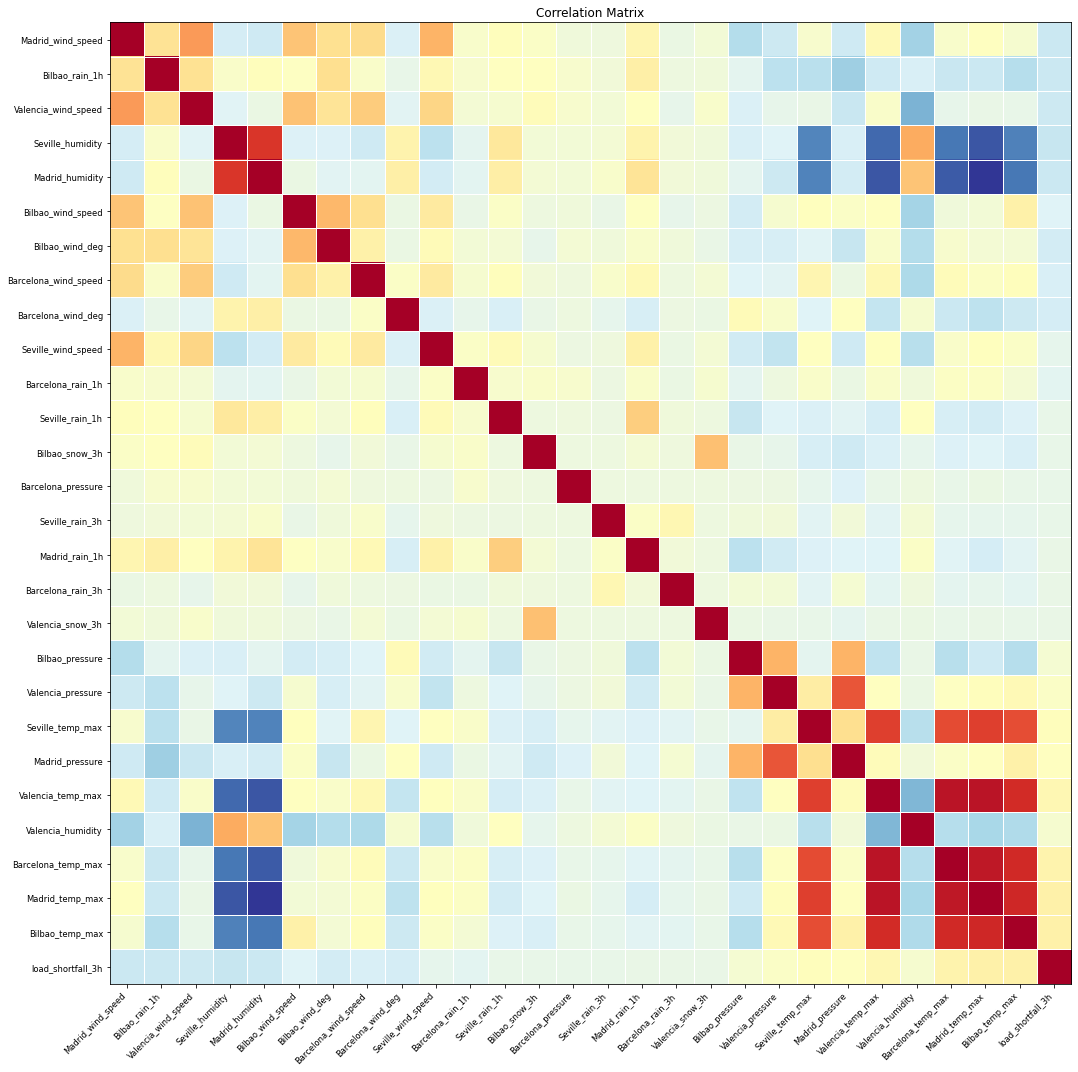

In [15]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df.corr(), xnames = improved_df.corr().columns, ax = ax);

From the above it can be seen that alot of features are still strongly correlated. We shall bear this features in mind, while we proceed to engineer *'Valencia_wind_deg','Seville_pressure'* features, because their current data type(object) will have some great negative impact on our model

In [16]:
improved_df['Seville_pressure'].head()

0    sp25
1    sp25
2    sp25
3    sp25
4    sp25
Name: Seville_pressure, dtype: object

In [17]:
improved_df = pd.get_dummies(improved_df, columns=['Valencia_wind_deg','Seville_pressure'],drop_first=True)
improved_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_wind_speed           8763 non-null   float64       
 7   Bilbao_wind_deg             8763 non-null   float64       
 8   Barcelona_wind_speed        8763 non-null   float64       
 9   Barcelona_wind_deg          8763 non-null   float64       
 10  Seville_wind_speed          8763 non-null   float64       
 11  Barcelona_rain_1h           8763 non-null   float64     

In [18]:
improved_df_2 = improved_df.copy()
improved_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_wind_speed           8763 non-null   float64       
 7   Bilbao_wind_deg             8763 non-null   float64       
 8   Barcelona_wind_speed        8763 non-null   float64       
 9   Barcelona_wind_deg          8763 non-null   float64       
 10  Seville_wind_speed          8763 non-null   float64       
 11  Barcelona_rain_1h           8763 non-null   float64     

In [19]:
improved_df_2.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,...,0,0,1,0,0,0,0,0,0,0


In [20]:
improved_df_2['year'] = improved_df_2['time'].dt.year
improved_df_2['month'] = improved_df_2['time'].dt.month
improved_df_2['week'] = improved_df_2['time'].dt.week
improved_df_2['day'] = improved_df_2['time'].dt.day
improved_df_2['hour'] = improved_df_2['time'].dt.hour
improved_df_2.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,year,month,week,day,hour
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,42.666667,...,0,0,0,0,0,2015,1,1,1,3
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,139.000000,...,0,0,0,0,0,2015,1,1,1,6
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,326.000000,...,0,0,0,0,0,2015,1,1,1,9
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,273.000000,...,0,0,0,0,0,2015,1,1,1,12
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,260.000000,...,0,0,0,0,0,2015,1,1,1,15


In [21]:
improved_df_2[['time','year','month','week','day','hour']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    8763 non-null   datetime64[ns]
 1   year    8763 non-null   int64         
 2   month   8763 non-null   int64         
 3   week    8763 non-null   int64         
 4   day     8763 non-null   int64         
 5   hour    8763 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 479.2 KB


### Correlation 
We plot the correlation heat map again, to enable us properly visualize this relationship

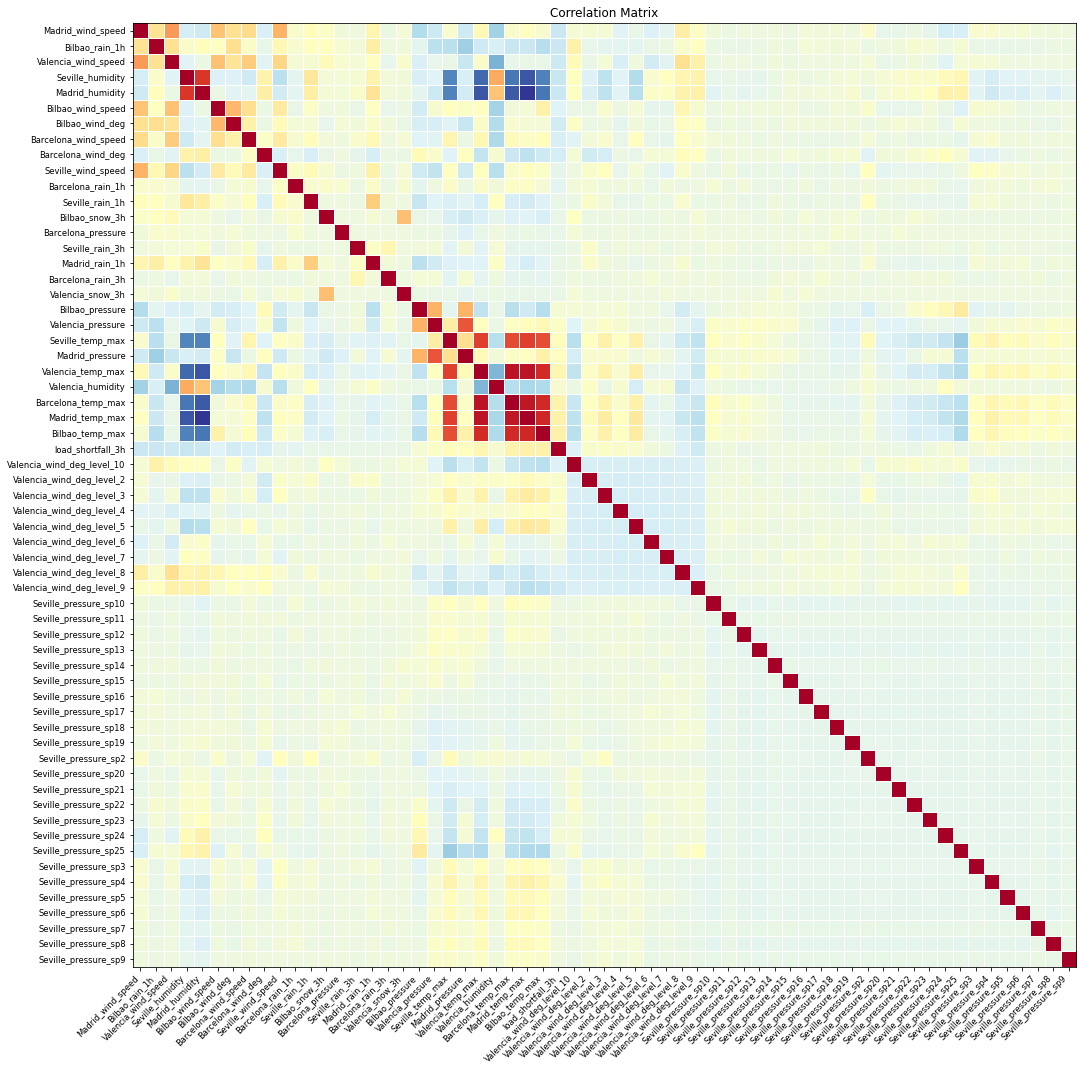

In [22]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df.corr(), xnames = improved_df.corr().columns, ax = ax);

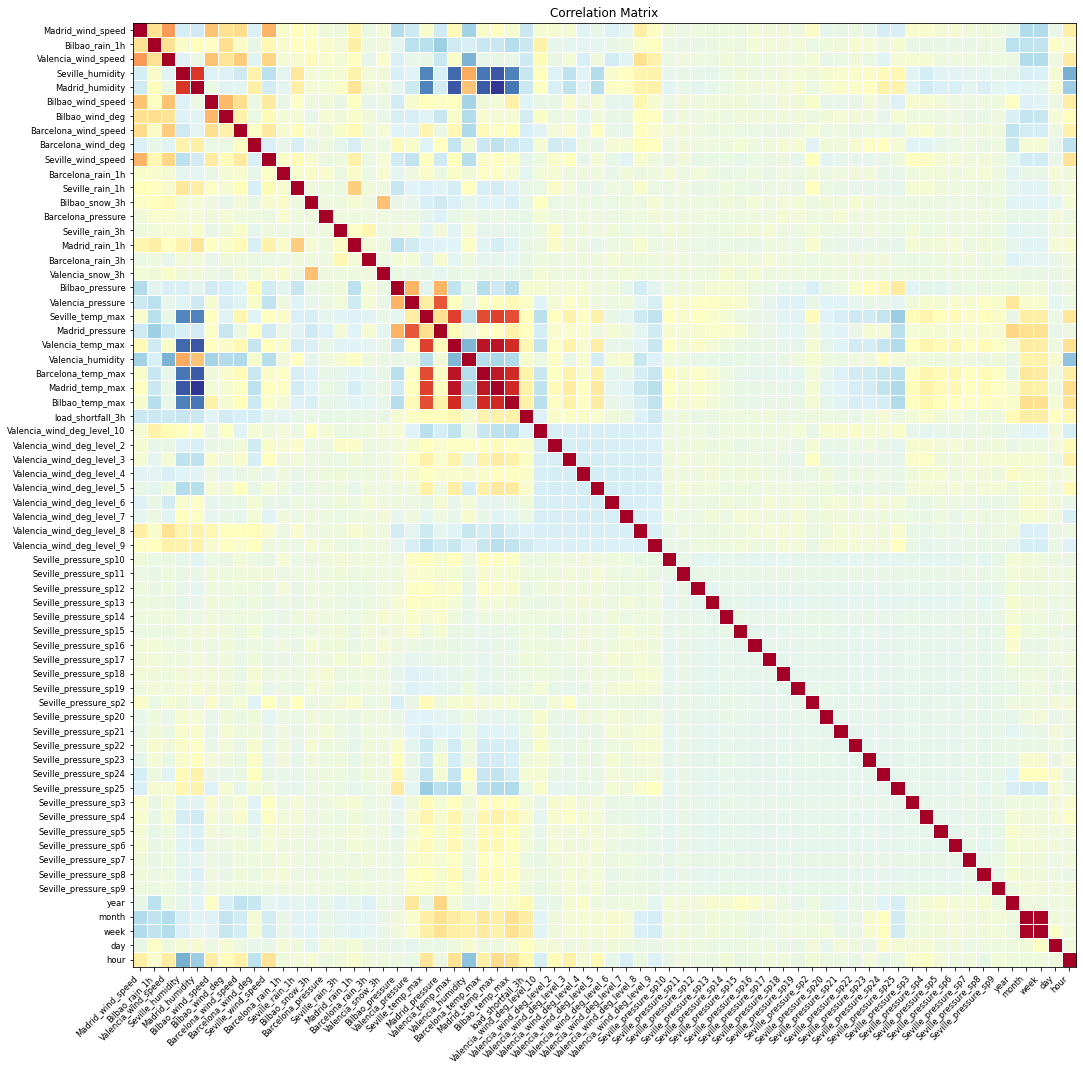

In [23]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df_2.corr(), xnames = improved_df_2.corr().columns, ax = ax);

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Fitting the model using `statsmodels.OLS`

We shall first, fit the model using statsmodels.ols, to enable us properly evaluate the appropriateness of the regression models we fit.

### Generating the regression string
We first generate a string of the form:

`y ~ X`

which is read as follows: "Regress y on X". 

#### Hence, we create targets and features dataset
To successfully achieve this, we first need to view the order of our columns, to confirm that it fits with the desired result

In [24]:
improved_df.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_humidity',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Bilbao_temp_max',
       'load_shortfall_3h', 'Valencia_wind_deg_level_10',
       'Valencia_wind_deg_level_2', 'Valencia_wind_deg_level_3',
       'Valencia_wind_deg_level_4', 'Valencia_wind_deg_level_5',
       'Valencia_wind_deg_level_6', 'Valencia_wind_deg_level_7',
       'Valencia_wind_deg_level_8', 'Valencia_wind_deg_level_9',
       'Seville_pressure_sp10', 'Seville_pressure_sp11',
      

From the result seen above, its obvious that we have to reorder our data set.

In [25]:
column_titles = [col for col in improved_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
improved_df = improved_df.reindex(columns=column_titles)
improved_df.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_humidity',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Bilbao_temp_max',
       'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
  

In [26]:
column_titles_2 = [col for col in improved_df_2.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
improved_df_2 = improved_df_2.reindex(columns=column_titles_2)
improved_df_2.columns

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_humidity',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Bilbao_temp_max',
       'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
  

In [27]:
formula_str = improved_df.columns[-1]+' ~ '+'+'.join(improved_df.columns[1:-1]); formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_humidity+Barcelona_temp_max+Madrid_temp_max+Bilbao_temp_max+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp11+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp14+Seville_pressure_sp15+Seville_pressure_sp16+Seville_pressure_sp17+Seville_pressure_sp18+Seville_pressure_sp19+Seville_pressure_sp2+Seville_pressure_sp20+Seville_pressu

In [28]:
formula_str_2 = improved_df_2.columns[-1]+' ~ '+'+'.join(improved_df_2.columns[1:-1]); formula_str_2

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Barcelona_rain_1h+Seville_rain_1h+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_humidity+Barcelona_temp_max+Madrid_temp_max+Bilbao_temp_max+Valencia_wind_deg_level_10+Valencia_wind_deg_level_2+Valencia_wind_deg_level_3+Valencia_wind_deg_level_4+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp11+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp14+Seville_pressure_sp15+Seville_pressure_sp16+Seville_pressure_sp17+Seville_pressure_sp18+Seville_pressure_sp19+Seville_pressure_sp2+Seville_pressure_sp20+Seville_pressu

### Construct and fit the model
​
We now go ahead and fit our model. We use the `ols` or Ordinary Least Squares regression model from the `statsmodels` library to do this:  

In [29]:
import statsmodels.formula.api as sm
model=sm.ols(formula=formula_str, data=improved_df)

In [30]:
# fit and print the model
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     20.93
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          7.19e-207
Time:                        15:48:50   Log-Likelihood:                -86853.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8702   BIC:                         1.743e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the result above

#### `R-squared : 0.147:`
The R-squared value is very far from 1, which is a signed to show that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, it can also be inferred that some featore are not rlevent to the model, and needs to be droped,there is also a warning about strong multicollinearity, which also resonates the result of the poor result we got above.

We proceed by droping features using the correlation heat map and the summary table above as a guide.


In [31]:
model_2=sm.ols(formula=formula_str_2, data=improved_df_2)
fitted_2 = model_2.fit()
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     25.16
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          2.38e-271
Time:                        15:48:51   Log-Likelihood:                -86689.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8697   BIC:                         1.740e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the result above

#### `R-squared : 0.158:`
The R-squared value is very far from 1, which is a signed to show that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, it can also be inferred that some featore are not rlevent to the model, and needs to be droped,there is also a warning about strong multicollinearity, which also resonates the result of the poor result we got above.

We proceed by droping features using the correlation heat map and the summary table above as a guide.

In [32]:
improved_df_cols = improved_df.columns
improved_df_cols

Index(['time', 'Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Bilbao_pressure', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_humidity',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Bilbao_temp_max',
       'Valencia_wind_deg_level_10', 'Valencia_wind_deg_level_2',
       'Valencia_wind_deg_level_3', 'Valencia_wind_deg_level_4',
       'Valencia_wind_deg_level_5', 'Valencia_wind_deg_level_6',
       'Valencia_wind_deg_level_7', 'Valencia_wind_deg_level_8',
       'Valencia_wind_deg_level_9', 'Seville_pressure_sp10',
       'Seville_pressure_sp11', 'Seville_pressure_sp12',
  

In [33]:
improved_df.shape

(8763, 62)

In [34]:
cols_to_drop = ['Valencia_humidity', 'Seville_pressure_sp14', 'Seville_pressure_sp15', 'Seville_pressure_sp16',
                 'Seville_pressure_sp17','Seville_pressure_sp18', 'Seville_pressure_sp2','Seville_pressure_sp23',
                 'Seville_pressure_sp4','Barcelona_rain_1h','Seville_rain_1h','Madrid_pressure',
                 'Valencia_wind_deg_level_2','Valencia_wind_deg_level_3','Valencia_wind_deg_level_4',
                 'Seville_pressure_sp11']

In [35]:
accepted_col_name = [col for col in improved_df_cols if col not in cols_to_drop]
improved_df = improved_df[accepted_col_name]
improved_df.shape

(8763, 46)

In [36]:
improved_df_2.shape

(8763, 67)

In [37]:
cols_to_drop_2 = ['Madrid_humidity','Valencia_wind_speed', 'Seville_pressure_sp14', 'Seville_pressure_sp15', 'Seville_pressure_sp16',
                  'Bilbao_wind_speed','Seville_wind_speed','Bilbao_snow_3h','Valencia_snow_3h','Bilbao_temp_max','Barcelona_rain_3h',
                  'Seville_pressure_sp17','Seville_pressure_sp18','Seville_pressure_sp19', 'Seville_pressure_sp20',
                  'Seville_pressure_sp21','Seville_pressure_sp22','Seville_pressure_sp25','Seville_pressure_sp3',
                  'Seville_pressure_sp6','Seville_pressure_sp11','Seville_pressure_sp4','Valencia_wind_deg_level_2','month',
                  'Valencia_wind_deg_level_3','Valencia_wind_deg_level_4','Valencia_wind_deg_level_5','Seville_pressure_sp11',
                 'Valencia_wind_deg_level_6','Seville_pressure_sp2']
len(cols_to_drop_2 )

30

In [38]:
improved_df_2_cols = improved_df_2.columns
accepted_col_name_2 = [col for col in improved_df_2_cols if col not in cols_to_drop_2]
improved_df_2_reduced_col = improved_df_2[accepted_col_name_2]
improved_df_2_reduced_col.shape

(8763, 38)

In [39]:
improved_df_2_reduced_col.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Seville_rain_1h,Barcelona_pressure,...,Seville_pressure_sp24,Seville_pressure_sp5,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,year,week,day,hour,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,0.0,74.333333,223.333333,6.333333,42.666667,0.0,0.0,1036.333333,...,0,0,0,0,0,2015,1,1,3,6715.666667
1,2015-01-01 06:00:00,0.333333,0.0,78.333333,221.000000,4.000000,139.000000,0.0,0.0,1037.333333,...,0,0,0,0,0,2015,1,1,6,4171.666667
2,2015-01-01 09:00:00,1.000000,0.0,71.333333,214.333333,2.000000,326.000000,0.0,0.0,1038.000000,...,0,0,0,0,0,2015,1,1,9,4274.666667
3,2015-01-01 12:00:00,1.000000,0.0,65.333333,199.666667,2.333333,273.000000,0.0,0.0,1037.000000,...,0,0,0,0,0,2015,1,1,12,5075.666667
4,2015-01-01 15:00:00,1.000000,0.0,59.000000,185.000000,4.333333,260.000000,0.0,0.0,1035.000000,...,0,0,0,0,0,2015,1,1,15,6620.666667


#### Review the correlation of the improved data set

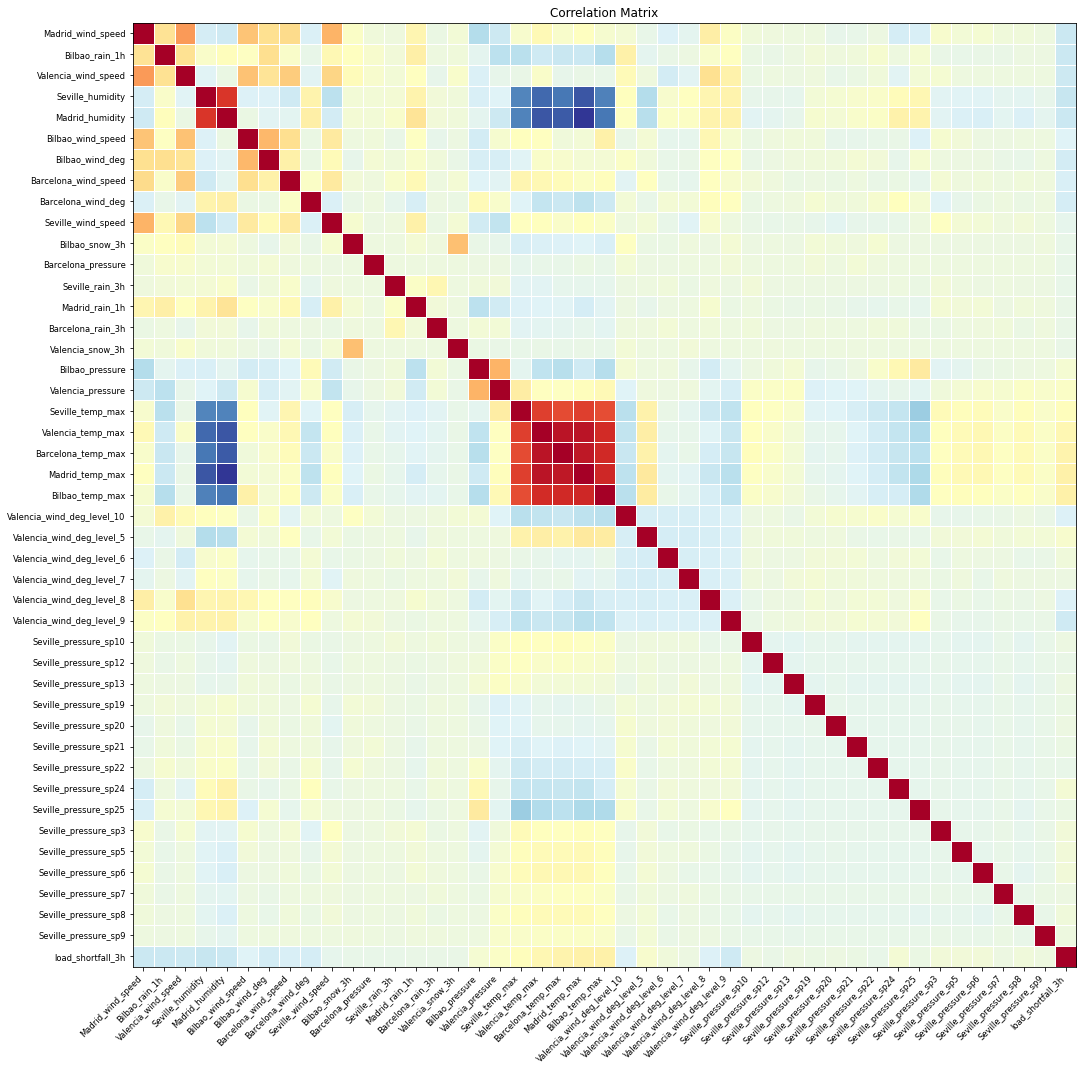

In [40]:

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df.corr(), xnames = improved_df.corr().columns, ax = ax);

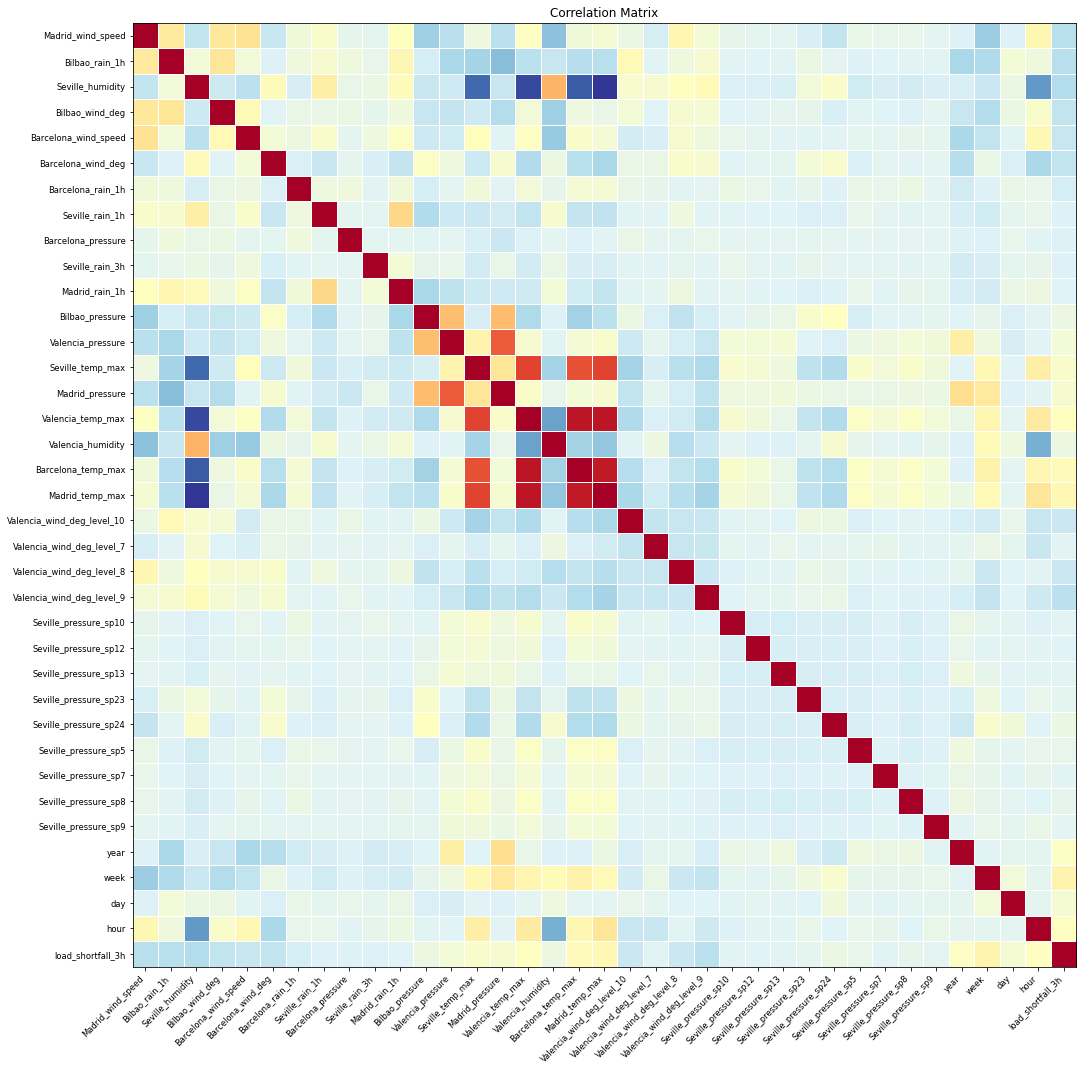

In [41]:

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(improved_df_2_reduced_col.corr(), xnames = improved_df_2_reduced_col.corr().columns, ax = ax);

From the above, we can still drop more features, infact we can drop all values that ends with humidity, as they are strongly negatively correlated to temperature values.


In [42]:
formula_str = improved_df.columns[-1]+' ~ '+'+'.join(improved_df.columns[1:-1]); formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Bilbao_snow_3h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Barcelona_rain_3h+Valencia_snow_3h+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Valencia_temp_max+Barcelona_temp_max+Madrid_temp_max+Bilbao_temp_max+Valencia_wind_deg_level_10+Valencia_wind_deg_level_5+Valencia_wind_deg_level_6+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp19+Seville_pressure_sp20+Seville_pressure_sp21+Seville_pressure_sp22+Seville_pressure_sp24+Seville_pressure_sp25+Seville_pressure_sp3+Seville_pressure_sp5+Seville_pressure_sp6+Seville_pressure_sp7+Seville_pressure_sp8+Seville_pressure_sp9'

In [43]:
model=sm.ols(formula=formula_str, data=improved_df)
# fit and print the model
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     27.26
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          2.68e-207
Time:                        15:48:52   Log-Likelihood:                -86879.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8718   BIC:                         1.742e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [44]:

formula_str_2 = improved_df_2_reduced_col.columns[-1]+' ~ '+'+'.join(improved_df_2_reduced_col.columns[1:-1]); formula_str_2

'load_shortfall_3h ~ Madrid_wind_speed+Bilbao_rain_1h+Seville_humidity+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Barcelona_rain_1h+Seville_rain_1h+Barcelona_pressure+Seville_rain_3h+Madrid_rain_1h+Bilbao_pressure+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_humidity+Barcelona_temp_max+Madrid_temp_max+Valencia_wind_deg_level_10+Valencia_wind_deg_level_7+Valencia_wind_deg_level_8+Valencia_wind_deg_level_9+Seville_pressure_sp10+Seville_pressure_sp12+Seville_pressure_sp13+Seville_pressure_sp23+Seville_pressure_sp24+Seville_pressure_sp5+Seville_pressure_sp7+Seville_pressure_sp8+Seville_pressure_sp9+year+week+day+hour'

In [45]:

model_2=sm.ols(formula=formula_str_2, data=improved_df_2_reduced_col)
# fit and print the model
fitted_2 = model_2.fit()
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          2.02e-289
Time:                        15:48:52   Log-Likelihood:                -86698.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8726   BIC:                         1.737e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Evaluating the two results above

#### `R-squared best value : 0.126(without time) & 0.158 (with time) for the best p-test threshold, 0.119(without time) & 0.156 (with time) `
The R-squared value is very far from 1, which further confirms that the generated model does not fit well

#### `P-value test`
From the result of the P-value test for each feature, which are all below 0.05 threshold, it further resonate that this model is not a good model for the data set.


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [46]:
# split data

In [47]:
# create targets and features dataset

In [48]:
# create one or more ML models

In [49]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [50]:
# Compare model performance

In [51]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [52]:
# discuss chosen methods logic